<a href="https://colab.research.google.com/github/lucianosilva-github/compiladores/blob/main/PARADIGMAS_PROVA_INTERMEDI%C3%81RIA_CORRECAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LINGUAGENS E PARADIGMAS - PROVA INTERMEDIÁRIA (PI) - CORREÇÃO DA PI**

**Prof. Luciano Silva**

In [ ]:
NOME: GABARITO

In [14]:
!pip install rply

Considere parte de uma linguagem funcional mostrada abaixo:

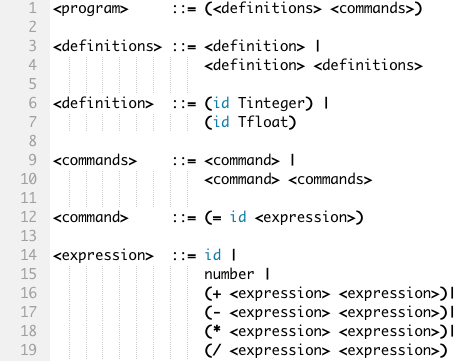


Nesta linguagem:

*   há 2 tipos númericos (Tinteger e TFloat), que são incompatíveis entre si, ou seja, Tinteger só pode ser operado com Tinteger e TFloat só com Tfloat.

* um comando de atribuição =, respeitando mesma restrição dos tipos numéricos, ou seja, variáveis Tinteger só pode receber valores Tinteger e, variáveis Tfloat, valores Tfloat.




**QUESTÃO 1. (0.5 ponto)** Escreva um exemplo de programa nesta linguagem que seja aceito por esta gramática. Este programa deverá ser usado nos testes subsequentes.

In [ ]:
((x Tinteger) (y Tinteger) (= x 3) (= y (+ x 1)))

**QUESTÃO 2. (1.0 ponto)** Implemente um analisador léxico para esta gramática:





In [11]:
from rply import LexerGenerator

lg = LexerGenerator()

lg.add('NUMBER', r'\d+(\.\d+)?')
lg.add('PLUS', r'\+')
lg.add('MINUS', r'-')
lg.add('MUL', r'\*')
lg.add('DIV', r'/')
lg.add('OPEN_PARENS', r'\(')
lg.add('CLOSE_PARENS', r'\)')

lg.add('INTEGER', r'Tinteger')
lg.add('FLOAT', r'Tfloat')
lg.add('ID', r'[a-zA-z][a-zA-z0-9]*')
lg.add('EQUALS', r'=')

lg.ignore('\s+')

lexer = lg.build()


In [12]:
tokens=lexer.lex('((x Tinteger) (y Tinteger) (= x 3) (= y (+ x 1)))')
for token in tokens:
  print(token)

Token('OPEN_PARENS', '(')
Token('OPEN_PARENS', '(')
Token('ID', 'x')
Token('INTEGER', 'Tinteger')
Token('CLOSE_PARENS', ')')
Token('OPEN_PARENS', '(')
Token('ID', 'y')
Token('INTEGER', 'Tinteger')
Token('CLOSE_PARENS', ')')
Token('OPEN_PARENS', '(')
Token('EQUALS', '=')
Token('ID', 'x')
Token('NUMBER', '3')
Token('CLOSE_PARENS', ')')
Token('OPEN_PARENS', '(')
Token('EQUALS', '=')
Token('ID', 'y')
Token('OPEN_PARENS', '(')
Token('PLUS', '+')
Token('ID', 'x')
Token('NUMBER', '1')
Token('CLOSE_PARENS', ')')
Token('CLOSE_PARENS', ')')
Token('CLOSE_PARENS', ')')


**QUESTÃO 3. (2.0 pontos)**Implemente classes para representar as árvores sintáticas geradas por esta gramática e que sejam capazes de receber visitors.

In [32]:
from rply.token import BaseBox

class Program(BaseBox):
    def __init__(self, decls,stmts):
        self.decls = decls
        self.stmts = stmts

    def accept(self, visitor):
        visitor.visit_program(self)

class Declarations(BaseBox):
    def __init__(self, decl,decls):
        self.decl = decl
        self.decls = decls

    def accept(self, visitor):
        visitor.visit_declarations(self)

class Declaration(BaseBox):
    def __init__(self, id,tp):
        self.id = id
        self.tp = tp


    def accept(self, visitor):
        visitor.visit_declaration(self)

class Statements(BaseBox):
    def __init__(self, stmt,stmts):
        self.stmt = stmt
        self.stmts = stmts

    def accept(self, visitor):
        visitor.visit_statements(self)

class Statement(BaseBox):
    def __init__(self, id,expr):
        self.id = id
        self.expr = expr

    def accept(self, visitor):
        visitor.visit_statement(self)

class Expr(BaseBox):
    def accept(self, visitor):
        method_name = 'visit_{}'.format(self.__class__.__name__.lower())
        visit = getattr(visitor, method_name)
        visit(self)

class Id(Expr):
    def __init__(self, value):
        self.value = value

class Number(Expr):
    def __init__(self, value):
        self.value = value


class BinaryOp(Expr):
    def __init__(self, left, right):
        self.left = left
        self.right = right

class Add(BinaryOp):
  pass


class Sub(BinaryOp):
  pass


class Mul(BinaryOp):
  pass


class Div(BinaryOp):
  pass


**QUESTÃO 4. (1.0 ponto)** Implemente um analisador sintático para esta gramática.

In [ ]:
from rply import ParserGenerator

pg = ParserGenerator(
    # A list of all token names, accepted by the lexer.
    ['NUMBER', 'OPEN_PARENS', 'CLOSE_PARENS',
     'PLUS', 'MINUS', 'MUL', 'DIV', 'TINTEGER', 'TFLOAT', 'ID',
     'EQUALS'
    ],
    # A list of precedence rules with ascending precedence, to
    # disambiguate ambiguous production rules.
    precedence=[
        ('left', ['PLUS', 'MINUS']),
        ('left', ['MUL', 'DIV'])
    ]
)

@pg.production('program : OPEN_PARENS definitions commands CLOSE_PARENS')
def prog(p):
    return Program(p[1].getstr(),p[3],p[4])

@pg.production('definitions : definition')
def vardecls(p):
    return Declarations(p[0],None)

@pg.production('definitions : definition definitions')
def vardecls(p):
    return Declarations(p[0],p[1])

@pg.production('definition : OPEN_PARENS ID TINTEGER CLOSE_PARENS')
def vardecl_integer(p):
    return Declaration(p[1].getstr(), "Tinteger")

@pg.production('definition : OPEN_PARENS ID TFLOAT CLOSE_PARENS')
def vardecl_float(p):
    return Declaration(p[1].getstr(), "Tfloat")


@pg.production('commands : command')
def statements_statement(p):
    return Statements(p[0],None)

@pg.production('commands : command commands')
def statement_statements(p):
    return Statements(p[0],p[1])

@pg.production('command : OPEN_PARENS EQUALS ID expression CLOSE_PARENS')
def statements_statement(p):
    return Statement(p[2].getstr(),p[3])


@pg.production('expression : ID')
def expression_id(p):
    return Id(p[0].getstr())

@pg.production('expression : NUMBER')
def expression_number(p):
    if "." in p[0].getstr():
      return Number(float(p[0].getstr()))
    return Number(int(p[0].getstr()))

@pg.production('expression : OPEN_PARENS PLUS expression  expression CLOSE_PARENS')
@pg.production('expression : OPEN_PARENS MINUS expression  expression CLOSE_PARENS')
@pg.production('expression : OPEN_PARENS MUL expression  expression CLOSE_PARENS')
@pg.production('expression : OPEN_PARENS DIV expression  expression CLOSE_PARENS')
def expression_binop(p):
    left = p[2]
    right = p[3]
    if p[1].gettokentype() == 'PLUS':
        return Add(left, right)
    elif p[1].gettokentype() == 'MINUS':
        return Sub(left, right)
    elif p[1].gettokentype() == 'MUL':
        return Mul(left, right)
    elif p[1].gettokentype() == 'DIV':
        return Div(left, right)
    else:
        raise AssertionError('Oops, this should not be possible!')

parser = pg.build()


In [ ]:
arvore=parser.parse(lexer.lex('((x Tinteger) (y Tinteger) (= x 3) (= y (+ x 1)))'))

In [33]:
# MONTAGEM DA ÁRVORE NA MÃO

# MONTAGEM DAS DECLARAÇÕES
declx=Declaration('x', "Tinteger")
decly=Declaration('y', "Tinteger")
declarations=Declarations(decly,None)
declarations=Declarations(declx,declarations)

#MONTAGEM DOS COMANDOS
cmd1=Statement('x',Number(3))
cmd2=Statement('y', Add(Id('x'),Number(1)))
commands = Statements(cmd2,None)
commands = Statements(cmd1,commands)

#MONTAGEM DO PROGRAMA

program=Program(declarations,commands)

#ARVORE APONTA PARA A ÁRVORE SINTÁTICA DEFINIDA POR PROGRAMA

arvore=program


**QUESTÃO 5. (1.0 ponto)**Implemente um visitor para montagem da tabela de símbolos.

In [34]:
ST={}

class Visitor(object):
  pass

class SymbolTable(Visitor):
    def visit_program(self, prog):
        prog.decls.accept(self)

    def visit_declarations(self, d):
        d.decl.accept(self)
        if d.decls!=None:
          d.decls.accept(self)

    def visit_declaration(self, d):
        ST[d.id]=d.tp

In [35]:
arvore.accept(SymbolTable())
print(ST)

{'x': 'Tinteger', 'y': 'Tinteger'}


**QUESTÃO 6. (2.0 pontos)**Implemente um visitor para decoração da árvore
 sintática.

In [37]:
class Decorator(Visitor):

    def visit_program(self, i):
        i.stmts.accept(self)

    def visit_statements(self, d):
        d.stmt.accept(self)
        if d.stmts!=None:
          d.stmts.accept(self)

    def visit_statement(self, i):
        if i.id in ST:
          i.decor_type=ST[i.id]
        else:
          raise AssertionError('id not declared')
        i.expr.accept(self)



    def visit_id(self, i):
        if i.value in ST:
          i.decor_type=ST[i.value]
        else:
          raise AssertionError('id not declared')


    def visit_number(self, i):
        if "." in str(i.value):
          i.decor_type="Tfloat"
        else:
          i.decor_type="Tinteger"


    def visit_add(self, a):
        a.left.accept(self)
        a.right.accept(self)
        if a.left.decor_type=="Tinteger" and a.right.decor_type=="Tinteger":
          a.decor_type="Tinteger"
        elif a.left.decor_type=="Tfloat" and a.right.decor_type=="Tfloat":
          a.decor_type="Tfloat"
        else:
          raise AssertionError('incompatible types')



    def visit_sub(self, a):
        a.left.accept(self)
        a.right.accept(self)
        if a.left.decor_type=="Tinteger" and a.right.decor_type=="Tinteger":
          a.decor_type="Tinteger"
        elif a.left.decor_type=="Tfloat" and a.right.decor_type=="Tfloat":
          a.decor_type="Tfloat"
        else:
          raise AssertionError('incompatible types')

    def visit_mul(self, a):
        a.left.accept(self)
        a.right.accept(self)
        if a.left.decor_type=="Tinteger" and a.right.decor_type=="Tinteger":
          a.decor_type="Tinteger"
        elif a.left.decor_type=="Tfloat" and a.right.decor_type=="Tfloat":
          a.decor_type="Tfloat"
        else:
          raise AssertionError('incompatible types')

    def visit_div(self, a):
        a.left.accept(self)
        a.right.accept(self)
        if a.left.decor_type=="Tinteger" and a.right.decor_type=="Tinteger":
          a.decor_type="Tinteger"
        elif a.left.decor_type=="Tfloat" and a.right.decor_type=="Tfloat":
          a.decor_type="Tfloat"
        else:
          raise AssertionError('incompatible types')



In [39]:
arvore.accept(Decorator())

**QUESTÃO 7. (1.0 ponto)**Implemente um visitor para verificação de tipos.

In [42]:
class TypeVerifier(Visitor):

    def visit_program(self, i):
        i.stmts.accept(self)

    def visit_statements(self, d):
        d.stmt.accept(self)
        if d.stmts!=None:
          d.stmts.accept(self)

    def visit_statement(self, i):
        if i.decor_type!= i.expr.decor_type:
            raise AssertionError('type error')


In [44]:
arvore.accept(TypeVerifier())


**QUESTÃO 8. (1.0 ponto)**Implemente um visitor para geração de código intermediário em P-CODE.



In [46]:
class IntermediateCode(Visitor):


  def __init__(self):
    self.ic=[] #lista com código intermediário

  def visit_program(self, i):
        i.stmts.accept(self)

  def visit_statements(self, d):
        d.stmt.accept(self)
        if d.stmts!=None:
          d.stmts.accept(self)

  def visit_statement(self, i):
        i.expr.accept(self)
        self.ic.append("sto 0 "+i.id)


  def visit_id(self, i):
    self.ic.append("lod 0 "+i.value)


  def visit_number(self, i):
    self.ic.append("lit 0 "+str(i.value))


  def visit_add(self, a):
    a.left.accept(self)
    a.right.accept(self)
    self.ic.append("opr 0 2")


  def visit_sub(self, a):
    a.left.accept(self)
    a.right.accept(self)
    self.ic.append("opr 0 3")

  def visit_mul(self, a):
    a.left.accept(self)
    a.right.accept(self)
    self.ic.append("opr 0 4")

  def visit_div(self, a):
    a.left.accept(self)
    a.right.accept(self)
    self.ic.append("opr 0 5")


In [47]:
icvisitor=IntermediateCode()
arvore.accept(icvisitor)
ic=icvisitor.ic   #código intermediário gerado
print(ic)

['lit 0 3', 'sto 0 x', 'lod 0 x', 'lit 0 1', 'opr 0 2', 'sto 0 y']


**QUESTÃO 9. (0.5 ponto)**Teste a sua implementação com o programa que vc escreveu na questão 1.

In [ ]:
arvore=parser.parse(lexer.lex('SEU PROGRAMA ESCRITO NA QUESTÃO 1'))
arvore.accept(SymbolTable())
arvore.accept(Decorator())
arvore.accept(TypeVerifier())
icvisitor=IntermediateCode()
arvore.accept(icvisitor)
ic=icvisitor.ic   #código intermediário gerado
print(ic)